In [1]:
import numpy as np
import hmvec as hm
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15
cosmo = Planck15

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [3]:
#Plot settings
%matplotlib inline
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 'large'
mpl.rcParams['ytick.labelsize'] = 'large'
mpl.rcParams['legend.fontsize'] = 'x-large'
mpl.rcParams['axes.titlesize'] = 'x-large'
mpl.rcParams['figure.titlesize'] = 'xx-large'

# Comparing with Fiona

Don't use the redshifts or masses Fiona sent over. Her data is on a different grid. Use the following.

Redshifts: linspace(0.01, 6, 60)

Masses: logspace(10, 16, 2000)

In [4]:
#Setup Grid
Nk = 10                                # num of wavenumbers
masses = np.logspace(10, 16, 2000)
redshifts = np.linspace(0.01, 6, 60)     
ks = np.geomspace(1.0e-3, 100.0, Nk)              # wavenumbers
Nm = len(masses)
Nz = len(redshifts)

In [5]:
#Initialize Halo Model 
hcos = hm.HaloModel(redshifts, ks, ms=masses, mass_function='tinker', mdef='mean')

In [6]:
#Set CIB Parameters
hcos.set_cibParams('planck13')

In [7]:
scratch_cori = '/global/cscratch1/sd/yogesh3/'
scratch_niagara = '/home/r/rbond/ymehta3/scratch/'
SCRATCH = scratch_cori

Load/setup Fiona's data:

In [8]:
fio_dndm = np.load('nfn.npy')
fio_masses = np.geomspace(masses[0], masses[-1], num=2000)
fio_bias = np.load('bias.npy')
fio_f217 = np.load('flux_217_nocutoff.npy')
fio_f353 = np.load('flux_353_nocutoff.npy')
fio_f545 = np.load('flux_545_nocutoff.npy')
fio_f857 = np.load('flux_857_nocutoff.npy')
fio_f3000 = np.load('flux_3000_nocutoff.npy')
fio_fluxes = [fio_f217, fio_f353, fio_f545, fio_f857, fio_f3000]

Load data from hmvec:

In [32]:
nzm = hcos.nzm

In [30]:
# dndm1 = np.load('/home/r/rbond/ymehta3/scratch/my_fnus.npy')
# dndm2 = np.load('/home/r/rbond/ymehta3/scratch/my_fnus2.npy')
# fnus = np.load(SCRATCH + 'fnus.npy')
# nus = np.load(SCRATCH + 'nus.npy')
# bh = np.load(SCRATCH + 'mybias.npy')
# nzm = np.load(SCRATCH + 'nzm.npy')

### Central Mass Function

NameError: name 'fio_nus' is not defined

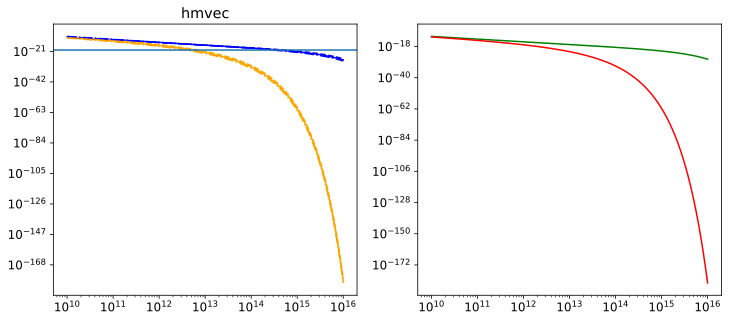

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

#hmvec
ax1.loglog(masses, nzm[0,:],  ls='-', color='blue', label=r'$f_\nu$, z=0.01')
ax1.loglog(masses, nzm[-1,:], ls='-', color='orange', label=r'$f_\nu$, z=6')
ax1.loglog(masses, (nus*nzm)[0,:],  ls='--', color='blue', label=r'$\nu*f_\nu$, z=0.01')
ax1.loglog(masses, (nus*nzm)[-1,:], ls='--', color='orange', label=r'$\nu*f_\nu$, z=6')
ax1.loglog(masses, (nzm/nus)[0,:],  ls='-.', color='blue', label=r'$f_\nu / \nu$, z=0.01')
ax1.loglog(masses, (nzm/nus)[-1,:], ls='-.', color='orange', label=r'$f_\nu / \nu$, z=6')

ax1.axhline(y=1e-20, label=r'10^{-20}')
ax1.set_title('hmvec')


#Fiona
ax2.loglog(fio_masses, fio_dndm[:,0],  ls='-', color ='green', label=r'$f_\nu$, z=0.01')
ax2.loglog(fio_masses, fio_dndm[:,-1], ls='-', color ='red', label=r'$f_\nu$, z=6')
ax2.loglog(fio_masses, fio_dndm[:,0]  * np.transpose(fio_nus[0,:]),  ls='--', color='green', label=r'$\nu*f_\nu$, z=0.01')
ax2.loglog(fio_masses, fio_dndm[:,-1] * np.transpose(fio_nus[-1,:]), ls='--', color='red', label=r'$\nu*f_\nu$, z=6')
ax2.loglog(fio_masses, fio_dndm[:,0]  / np.transpose(fio_nus[0,:]),  ls='-.', color='green', label=r'$f_\nu / \nu$, z=0.01')
ax2.loglog(fio_masses, fio_dndm[:,-1] / np.transpose(fio_nus[-1,:]), ls='-.', color='red', label=r'$f_\nu / \nu$, z=6')

ax2.axhline(y=1e-20, label=r'$10^{-20}$')
ax2.set_title('fiona')

# plt.yscale('linear')
ax1.set_xlabel('Mass')
ax2.set_xlabel('Mass')
ax1.legend()
ax2.legend()
fig.suptitle('Central Mass Function');

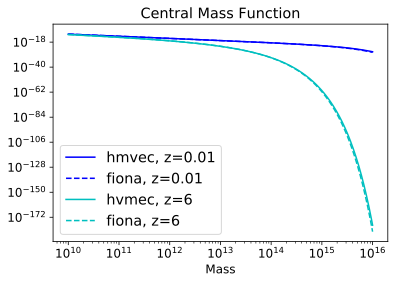

In [35]:
plt.loglog(masses, nzm[0,:], 'b', label='hmvec, z=0.01')
plt.loglog(fio_masses, fio_dndm[:,0], 'b--', label='fiona, z=0.01')

plt.loglog(masses, nzm[-1,:], 'c', label='hvmec, z=6')
plt.loglog(fio_masses, fio_dndm[:,-1], 'c--', label='fiona, z=6')

plt.xlabel('Mass')
plt.legend()
plt.title('Central Mass Function');

### Bias

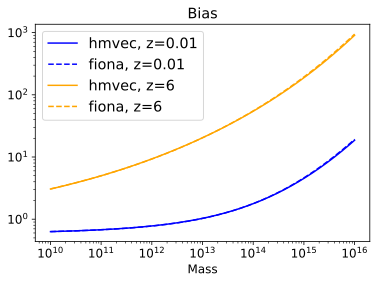

In [12]:
plt.loglog(masses, bh[0, :], label='hmvec, z=0.01', color='blue')
plt.loglog(fio_masses, fio_bias[:,0], label='fiona, z=0.01', color='blue', ls='--')

plt.loglog(masses, bh[-1, :], label='hmvec, z=6', color='orange')
plt.loglog(fio_masses, fio_bias[:,-1], label='fiona, z=6', color='orange', ls='--')

plt.xlabel('Mass')
plt.legend()
plt.title('Bias');

### Flux

Calculate fluxes.

In [9]:
f217 = hcos.get_flux(np.array([217e9], dtype=np.double))
f353 = hcos.get_flux(np.array([353e9], dtype=np.double))
f545 = hcos.get_flux(np.array([545e9], dtype=np.double))
f857 = hcos.get_flux(np.array([857e9], dtype=np.double))
f3000 = hcos.get_flux(np.array([3000e9], dtype=np.double))

myfluxes = [f217, f353, f545, f857, f3000]

Look at the subhalo mass function

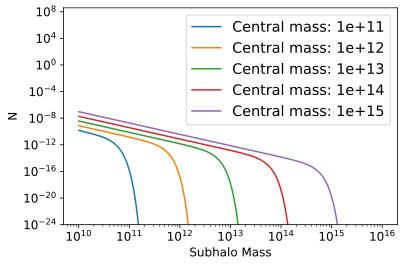

In [26]:
mcens = [1e11, 1e12, 1e13, 1e14, 1e15]
for mcen in mcens:
    plt.loglog(masses, hm.sdndm(masses, mcen), label=f'Central mass: {mcen:.0e}')
plt.xlabel('Subhalo Mass')
plt.ylabel('N')
plt.ylim(bottom=1e-24)
plt.legend();

Figure out which redshifts to mask.

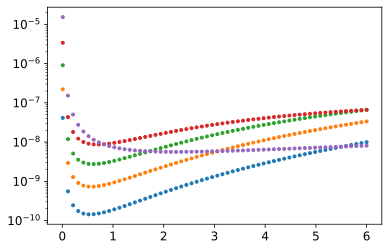

In [44]:
for flux in myfluxes:
    plt.plot(redshifts, flux[:,0,0], '.')
    plt.yscale('log')

Plot hmvec and Fiona's fluxes.

<ipython-input-14-1e59ac62852d>:15: UserWarning: Log scale: values of z <= 0 have been masked
  hmvec = ax1.contourf(masses, redshifts, myflux[:,:,0] * mask[:,:,0],
<ipython-input-14-1e59ac62852d>:27: UserWarning: Log scale: values of z <= 0 have been masked
  fiona = ax2.contourf(masses, redshifts, np.transpose(fio_fluxes[i]),


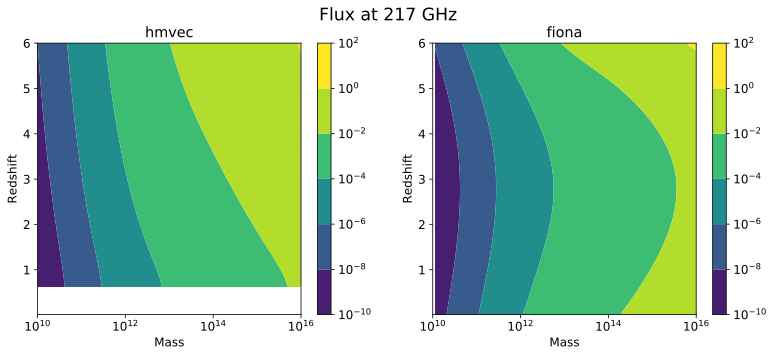

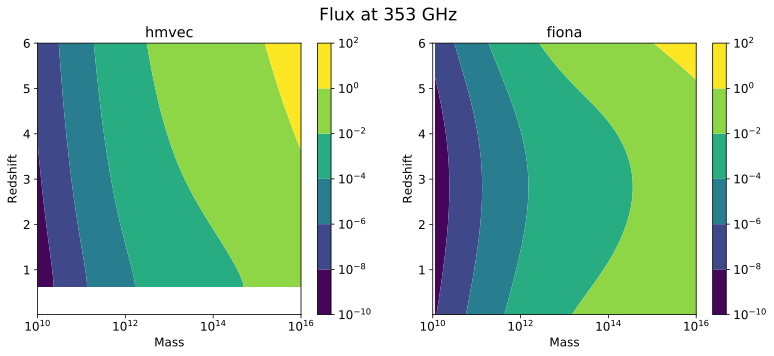

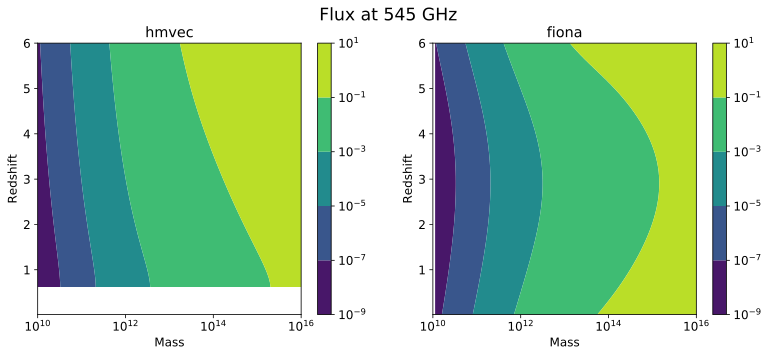

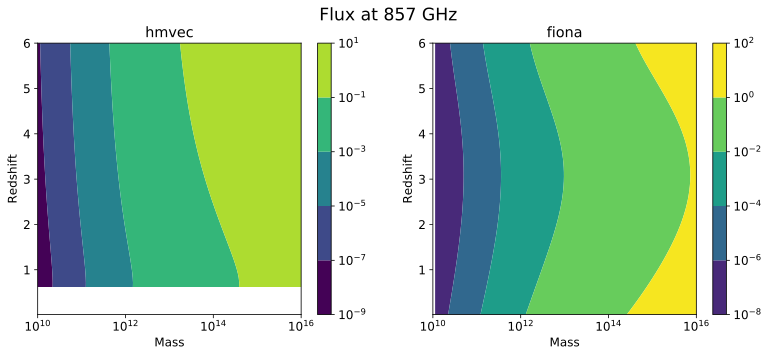

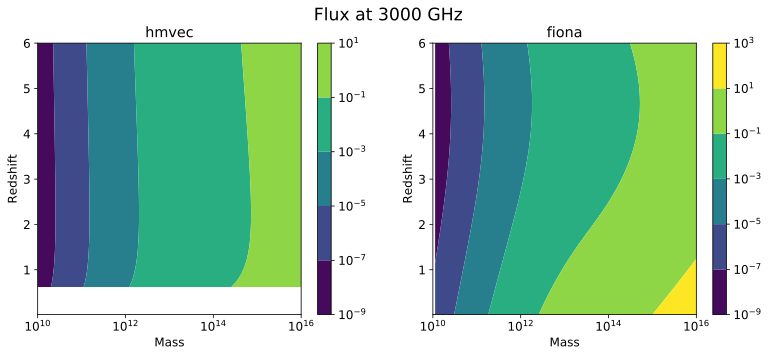

In [14]:
freqs = ['217', '353', '545', '857', '3000']

#Mask Upticks at Low z
mask = np.ones(myfluxes[0].shape)
Nmaskedzs = 6
for j in range(Nmaskedzs):
    mask[j, :, :] *= 0.
        
#Plot
for i, myflux in enumerate(myfluxes):
    #Setup
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))

    #hmvec
    hmvec = ax1.contourf(masses, redshifts, myflux[:,:,0] * mask[:,:,0], 
                        norm = mpl.colors.LogNorm(vmin=myflux[:,:,0].min(), vmax=fio_fluxes[i].max()))
    fig.colorbar(hmvec, ax=ax1)

    #Gravy 1
    ax1.set_xscale('log')
    ax1.set_xlabel('Mass')
    ax1.set_ylabel('Redshift')
    ax1.set_title('hmvec')
    ax1.tick_params()

    #Fiona
    fiona = ax2.contourf(masses, redshifts, np.transpose(fio_fluxes[i]),
                         norm = mpl.colors.LogNorm(vmin=myflux[:,:,0].min(), vmax=fio_fluxes[i].max()))
    fig.colorbar(fiona, ax=ax2)

    #Gravy 2
    ax2.set_xscale('log')
    ax2.set_xlabel('Mass')
    ax2.set_ylabel('Redshift')
    ax2.set_title('fiona')
    ax2.tick_params()

    #Super Plot
    fig.suptitle(f'Flux at {freqs[i]} GHz');

# CIB x CIB

### 3D Power Spectrum

First, let's get our 3D power spectrum.

In [ ]:
#Get Power Spectra
hcos.get_power_2halo('cib', nu_obs=[[545]])

In [ ]:
integrand = np.load('integrand.npy')

plt.contourf(redshifts, masses, integrand)
plt.title('2h D integrand: 545 Ghz')
plt.yscale('log')
plt.colorbar()
plt.xlabel('z')
plt.ylabel(r'Mass ($M_{\odot}$)')

ax = plt.gca()

#Y axis Ticks
majloc = plt.LogLocator(numticks=10)
ax.yaxis.set_major_locator(majloc)
minorticks = np.arange(0.1, 1, 0.1)
minloc = plt.LogLocator(subs=minorticks, numticks=10)
ax.yaxis.set_minor_locator(minloc)

print(ax.yaxis.get_minor_locator())
print(ax.yaxis.get_minor_formatter())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_minor_formatter())

plt.savefig('hmvec_int.pdf', dpi=600, bbox_inches='tight')

Now let's plot it. We expect it to peak at around k = 0.02

In [ ]:
#Which zs to look at
test_zs = np.array([0.1, 0.5, 1, 1.5, 3, 6, 7])

#Plot Power Spectra
plt.figure(figsize=(15,8))
for z in test_zs:
    #Get index
    zi = np.where(abs(z - redshifts) <= 0.05)[0][0]
    
    #Spectra
    plt.loglog(ks, Pjj_2h[zi,:], label=f"z = {redshifts[zi]:0.2f}")

#Plot Peak
kpeak = ks[np.argmax(Pjj_2h[0,:])]
plt.axvline(x = kpeak, ls='--', color='orange', label=f'Peak at k = {kpeak:0.3f}')

#Gravy
plt.legend()
plt.ylabel(r"$P_{jj, 2halo}$")
plt.xlabel('k')
plt.savefig('Pjj.png', dpi=500, bbox_inches='tight');

In [ ]:
#Plot the u(z,k)
plt.figure(figsize=(15,8))
for z in test_zs:
    plt.loglog(ks, hcos.u[z,])

### 2D Power Spectrum

Now let's integrate along the redshift to get the 2D power spectrum.

In [ ]:
#Limber Integrals
Nl = 1000
ells = np.linspace(5, 1000, Nl)
Cii, Cii_integrand = hcos.C_ii(ells, redshifts, ks, Pjj_2h, dcdzflag=True)

#Plot Cii
plt.loglog(ells, Cii)
plt.xlabel(r'$\ell$')
plt.ylabel(rf'$C^{{ {freq[0,0]:0.0f} \;x\; {freq[0,0]:0.0f} }}_\ell$');
plt.savefig('Cii_2h.png', dpi=900, bbox_inches='tight')

## $\frac{dC_{II}}{dz} (z, \ell)$

There are still some wiggles at around $\ell \sim 2\times10^2 - 6 \times 10^2$, which should be smoothed out, so let's plot the integrand of the limber integral to see what's up.

In [ ]:
#Which ells to look at
test_ells = np.array([2.0e2, 3.0e2, 4.0e2, 5.0e2, 6.0e2])

#Plot
plt.figure(figsize=(10,7))
for ell in test_ells:
    #Get index
    i = np.where(abs(ell - ells) <= 1)[0][0]

    #Spectra
    plt.semilogy(redshifts, Cii_integrand[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.title(r'$\frac{dC_{II}}{dz}$', fontsize=24)
    plt.legend()
plt.savefig('dCdz_ii_l.png', dpi=500, bbox_inches='tight');

# Lensing x Lensing

## $\frac{dC_{\kappa \kappa}}{dz} (z, \ell)$

First, let's add to the model.

In [ ]:
#Add to the model
zsource = 1.0 # delta-function source population
ngal = 1e-4 # number density of lenses per mpc3 (to solve for stellar mass threshold in HOD)
hcos.add_hod("g",ngal=ngal+redshifts*0.,corr="max")
hcos.add_battaglia_profile("electron",family="AGN",xmax=50,nxs=30000)

Now we can actually calculate all of the power spectra.

In [ ]:
#Power Spectra
Pnn = hcos.get_power("nfw",verbose=False)
Pne = hcos.get_power("nfw","electron",verbose=False )
Pee = hcos.get_power("electron","electron",verbose=False )
Pmm = hcos.total_matter_power_spectrum(Pnn,Pne,Pee)

#Limber Integrals
Ckk0, Ckk0_integrand = hcos.C_kk(ells,redshifts,ks,Pnn,lzs1=zsource,lzs2=zsource, dcdzflag=True)
Ckk, Ckk_integrand = hcos.C_kk(ells,redshifts,ks,Pmm,lzs1=zsource,lzs2=zsource, dcdzflag=True)

And finally, plot the integrand of the limber integral.

The first is $C/C_0$.

In [ ]:
plt.figure(figsize=(10,7))

for ell in test_ells:
    #Get index
    i = np.where(abs(ell - ells) <= 1)[0][0]

    #Plot
    plt.semilogy(redshifts, Ckk_integrand[:, i]/Ckk0_integrand[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.title(r'$\frac{dC^{\kappa \kappa}}{dC^{\kappa \kappa}_0}$', fontsize=24)
    plt.legend()

plt.savefig('dCdz_kk_0.png', dpi=500, bbox_inches='tight');

In [ ]:
#Plot
plt.figure(figsize=(10,7))

for ell in test_ells:
    #Get index
    i = np.where(abs(ell - ells) <= 1)[0][0]

    #Plot
    plt.semilogy(redshifts, Ckk_integrand[:, i], label=rf"$\ell = {ells[i]:0.0f}$")

    #Gravy
    plt.xlabel(r'$z$')
    plt.title(r'$\frac{dC^{\kappa \kappa}}{dz}$', fontsize=24)
    plt.legend()
    
plt.savefig('dCdz_kk.png', dpi=500, bbox_inches='tight');

### 2D Power Spectrum

Let's now manually integrate the integrand w.r.t. redshift to see if we get back our 2D power spectrum.

In [ ]:
#Integrate
Ckk_man = np.trapz(Ckk_integrand, redshifts, axis=0)
Ckk0_man = np.trapz(Ckk0_integrand, redshifts, axis=0)

#Plot
plt.figure(figsize = (7,5))
plt.plot(ells, Ckk_man/Ckk0_man, color='red', label='Manually integrated')
plt.plot(ells, Ckk/Ckk0, ls='--', label='From hmvec')
plt.ylabel(r"$C^{kk}/C^{kk}_{0}$")
plt.xlabel(r"$\ell$")
plt.legend()

plt.savefig('Ckk_compare.png', dpi=500, bbox_inches='tight');

We see that we are indeed looking at the correct integrand.